<a href="https://colab.research.google.com/github/DayaAlex/ML_Course_Project_SVM/blob/main/m1_ai_09ml_course_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


1. Studying soft margin SVMs

In [ ]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#data framing
import pandas as pd
  
#reading the train text file(train_1.txt) using read_csv, by specifying the seperation as space: " "
# and creating dataframe
dataframe1 = pd.read_csv("/content/gdrive/MyDrive/course project/Daya Alex - train_1.txt" ,sep='\s+') # we use read csv to take space spearated values
  
# storing this dataframe in a csv file
dataframe1.to_csv('/content/gdrive/MyDrive/course project/Daya Alex - train_1.csv', index = None)

#doing the same with test_1.txt
dataframe2 = pd.read_csv("/content/gdrive/MyDrive/course project/Daya Alex - test_1.txt" ,sep='\s+')  
dataframe2.to_csv('/content/gdrive/MyDrive/course project/Daya Alex - test_1.csv',index = None)

In [ ]:
dataframe1.head()# feautures corresponding to 0th and 1st column, target in 2nd column

,97.855421,125.387990,1
0,48.571973,104.501180,1
1,80.250214,106.601290,1
2,114.659380,76.893242,-1
3,80.156290,92.579178,1
4,123.656360,58.595884,-1


In [ ]:
dataframe2.head()

,133.437860,103.810470,-1
0,121.698080,104.574480,-1
1,125.708830,73.536465,-1
2,84.161628,131.217610,1
3,131.302240,96.246931,-1
4,156.370150,110.324550,-1


In [ ]:
#data preparation
x_train = dataframe1.iloc[:,0:2].values
y_train = dataframe1.iloc[:,2].values
x_test = dataframe2.iloc[:,0:2].values
y_test = dataframe2.iloc[:,2].values

1.A. Hard Margin SVM for benchmarking

In [ ]:
#traning svm without c
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
model.score(x_test, y_test)

1.0

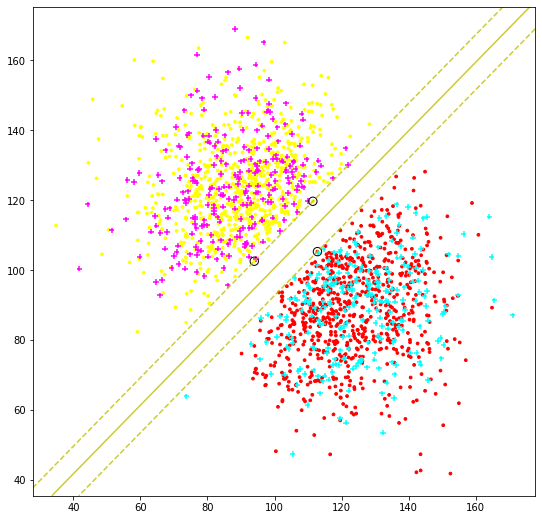

In [ ]:
#plotting graph
y_pred=model.predict(x_test)
fig=plt.figure(figsize=(9,9))
#plotting training data in autumn gradient
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,marker='.',s=30,cmap='autumn')
#plotting testing data in cool gradient
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred,marker='+',s=30,cmap='cool')
#initialising 'ax' object to work with axes
ax=plt.gca()
#obtaing the upper limit and lower limit of x axis corresponding to X[0],X[1] feature and Y[0]and Y[1] labels
xlim=ax.get_xlim()
ylim=ax.get_ylim()
#extracting 30 equally spaced values within the limits and creating a meshgrid 30*30
xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)
YY,XX=np.meshgrid(yy,xx)
#obtaining hyperpanes
xy=np.vstack([XX.ravel(),YY.ravel()]).T
Z=model.decision_function(xy).reshape(XX.shape)
ax.contour(XX,YY,Z,colors='y',levels=[-1,0,1],alpha=0.8,linestyles=['--','-','--'])
#library obtaing support vectors on the support margins
ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=70,linewidth=1,facecolors='none',edgecolors='black')
plt.show()

In [ ]:
#c=0.05
from sklearn.svm import SVC
model=SVC(kernel='linear', C=0.05)
model.fit(x_train, y_train)

SVC(C=0.05, kernel='linear')

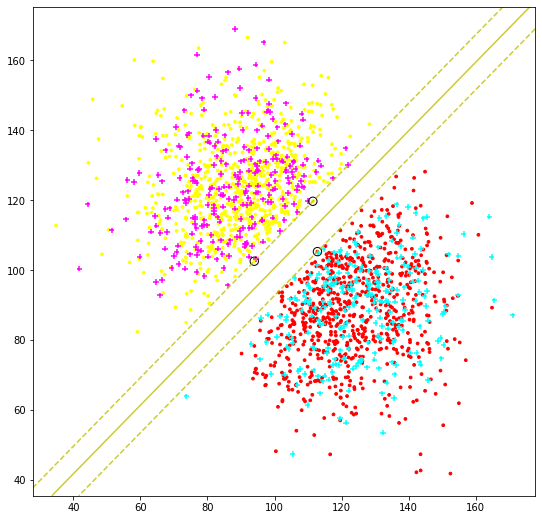

In [ ]:
y_pred=model.predict(x_test)
fig=plt.figure(figsize=(9,9))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,marker='.',s=30,cmap='autumn')
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred,marker='+',s=30,cmap='cool')
ax=plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)
YY,XX=np.meshgrid(yy,xx)
xy=np.vstack([XX.ravel(),YY.ravel()]).T
Z=model.decision_function(xy).reshape(XX.shape)
ax.contour(XX,YY,Z,colors='y',levels=[-1,0,1],alpha=0.8,linestyles=['--','-','--'])
ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=70,linewidth=1,facecolors='none',edgecolors='black')
plt.show()

In [ ]:
misclassification = 1 - model.score(x_test, y_test)
print("Misclassified samples for C:{} are {}".format('C',misclassification))

Misclassified samples for C:C are 0.0


In [ ]:
#c=0.01
from sklearn.svm import SVC
model=SVC(kernel='linear', C=0.01)
model.fit(x_train, y_train)

SVC(C=0.01, kernel='linear')

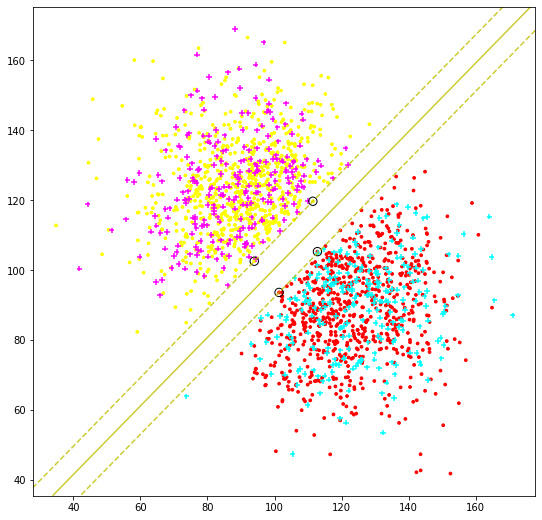

In [ ]:
y_pred=model.predict(x_test)
fig=plt.figure(figsize=(9,9))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,marker='.',s=30,cmap='autumn')
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred,marker='+',s=30,cmap='cool')
ax=plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)
YY,XX=np.meshgrid(yy,xx)
xy=np.vstack([XX.ravel(),YY.ravel()]).T
Z=model.decision_function(xy).reshape(XX.shape)
ax.contour(XX,YY,Z,colors='y',levels=[-1,0,1],alpha=0.8,linestyles=['--','-','--'])
ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=70,linewidth=1,facecolors='none',edgecolors='black')
plt.show()

In [ ]:
misclassification = 1 - model.score(x_test, y_test)
print("Misclassified samples for C:{} are {}".format('C',misclassification))

Misclassified samples for C:C are 0.0


In [ ]:
#c=0.001
from sklearn.svm import SVC
model=SVC(kernel='linear', C=0.001)
model.fit(x_train, y_train)

SVC(C=0.001, kernel='linear')

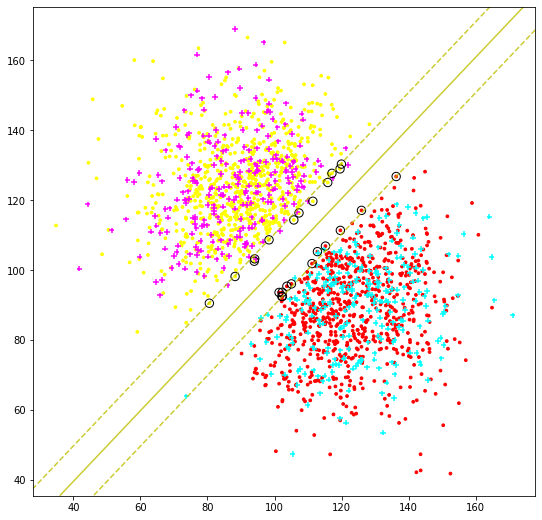

In [ ]:
y_pred=model.predict(x_test)
fig=plt.figure(figsize=(9,9))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,marker='.',s=30,cmap='autumn')
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred,marker='+',s=30,cmap='cool')
ax=plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)
YY,XX=np.meshgrid(yy,xx)
xy=np.vstack([XX.ravel(),YY.ravel()]).T
Z=model.decision_function(xy).reshape(XX.shape)
ax.contour(XX,YY,Z,colors='y',levels=[-1,0,1],alpha=0.8,linestyles=['--','-','--'])
ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=70,linewidth=1,facecolors='none',edgecolors='black')
plt.show()

In [ ]:
misclassification = 1 - model.score(x_test, y_test)
print("Misclassified samples for C:{} are {}".format('C',misclassification))

Misclassified samples for C:C are 0.0


In [ ]:
#c=0.0001
from sklearn.svm import SVC
model=SVC(kernel='linear', C=0.0001)
model.fit(x_train, y_train)

SVC(C=0.0001, kernel='linear')

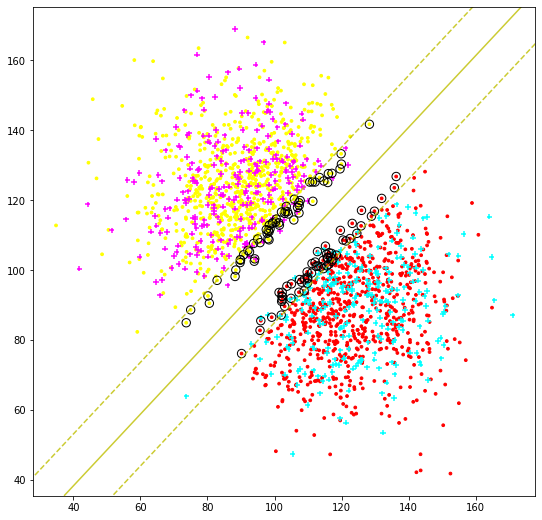

In [ ]:
y_pred=model.predict(x_test)
fig=plt.figure(figsize=(9,9))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,marker='.',s=30,cmap='autumn')
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred,marker='+',s=30,cmap='cool')
ax=plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)
YY,XX=np.meshgrid(yy,xx)
xy=np.vstack([XX.ravel(),YY.ravel()]).T
Z=model.decision_function(xy).reshape(XX.shape)
ax.contour(XX,YY,Z,colors='y',levels=[-1,0,1],alpha=0.8,linestyles=['--','-','--'])
ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=70,linewidth=1,facecolors='none',edgecolors='black')
plt.show()

In [ ]:
misclassification = 1 - model.score(x_test, y_test)
print("Misclassified samples for C:{} are {}".format('C',misclassification))

Misclassified samples for C:C are 0.0


In [ ]:
#c=2
from sklearn.svm import SVC
model=SVC(kernel='linear',C=2)
model.fit(x_train, y_train)

SVC(C=2, kernel='linear')

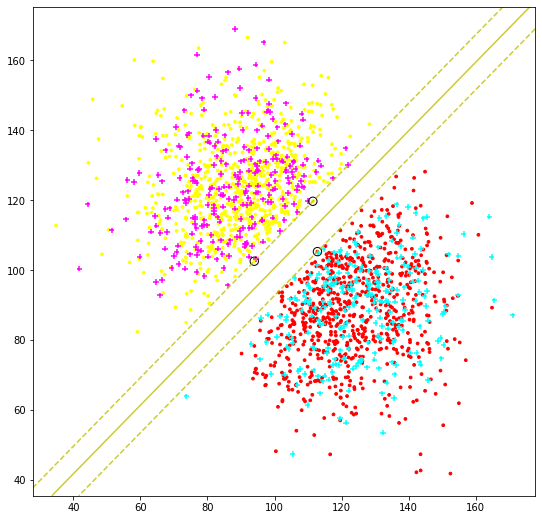

In [ ]:
y_pred=model.predict(x_test)
fig=plt.figure(figsize=(9,9))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,marker='.',s=30,cmap='autumn')
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred,marker='+',s=30,cmap='cool')
ax=plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)
YY,XX=np.meshgrid(yy,xx)
xy=np.vstack([XX.ravel(),YY.ravel()]).T
Z=model.decision_function(xy).reshape(XX.shape)
ax.contour(XX,YY,Z,colors='y',levels=[-1,0,1],alpha=0.8,linestyles=['--','-','--'])
ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=70,linewidth=1,facecolors='none',edgecolors='black')
plt.show()

In [ ]:
#data framing second data set
# importing panda library
import pandas as pd
  
# readinag given csv file
# and creating dataframe
dataframe3 = pd.read_csv(r"/content/gdrive/MyDrive/course project/Daya Alex - train_2.txt" ,sep='\s+')
  
# storing this dataframe in a csv file
dataframe3.to_csv('/content/gdrive/MyDrive/course project/Daya Alex - train_2.csv', 
                  index = None)
# readinag given csv file
# and creating dataframe
dataframe4 = pd.read_csv("/content/gdrive/MyDrive/course project/Daya Alex - test_2.txt" ,sep='\s+')
  
# storing this dataframe in a csv file
dataframe4.to_csv('/content/gdrive/MyDrive/course project/Daya Alex - test_2.csv', 
                  index = None)

In [ ]:
dataframe3.head()

,84.353392,130.449270,1
0,100.524960,79.702516,-1
1,89.512684,124.804950,1
2,113.372110,94.912111,-1
3,100.086890,108.298000,1
4,83.467432,108.920550,1


In [ ]:
dataframe4.head()

,64.878770,102.692150,1
0,108.984550,124.639570,1
1,115.183720,111.992980,-1
2,86.276196,78.977226,-1
3,85.926823,109.058520,1
4,101.680220,89.549906,-1


In [ ]:
x_train= dataframe3.iloc[:,0:2].values
y_train= dataframe3.iloc[:,2].values
x_test = dataframe4.iloc[:,0:2].values
y_test = dataframe4.iloc[:,2].values

In [ ]:
#without C
from sklearn.svm import SVC
model=SVC(kernel='linear' )
model.fit(x_train, y_train)

SVC(kernel='linear')

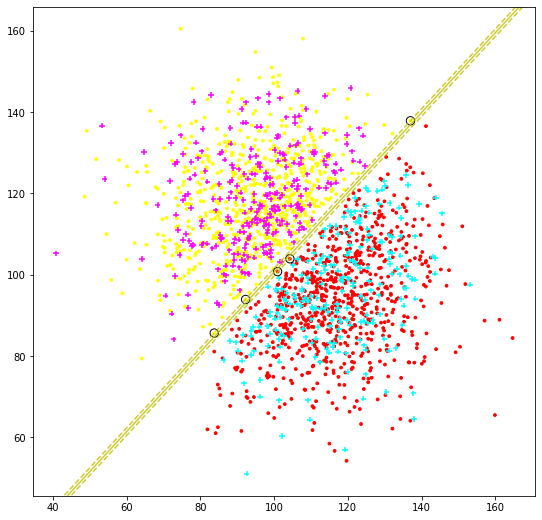

In [ ]:
y_pred=model.predict(x_test)
fig=plt.figure(figsize=(9,9))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,marker='.',s=30,cmap='autumn')
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred,marker='+',s=30,cmap='cool')
ax=plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)
YY,XX=np.meshgrid(yy,xx)
xy=np.vstack([XX.ravel(),YY.ravel()]).T
Z=model.decision_function(xy).reshape(XX.shape)
ax.contour(XX,YY,Z,colors='y',levels=[-1,0,1],alpha=0.8,linestyles=['--','-','--'])
ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=70,linewidth=1,facecolors='none',edgecolors='black')
plt.show()

In [ ]:
model.score(x_test, y_test)

1.0

In [ ]:
C=0.0005
from sklearn.svm import SVC
model=SVC(kernel='linear',C=0.0005 )
model.fit(x_train, y_train)

SVC(C=0.0005, kernel='linear')

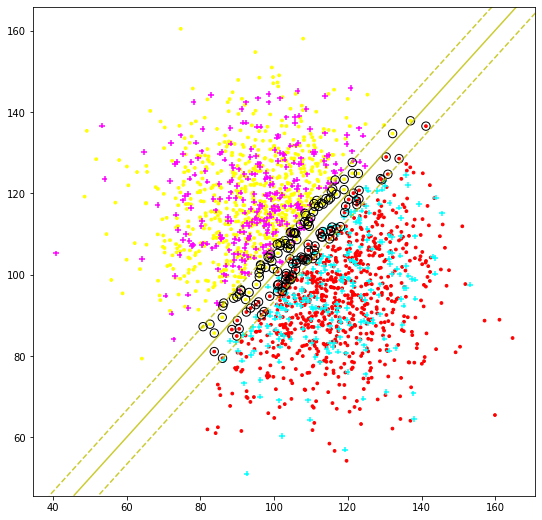

In [ ]:
y_pred=model.predict(x_test)
fig=plt.figure(figsize=(9,9))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,marker='.',s=30,cmap='autumn')
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred,marker='+',s=30,cmap='cool')
ax=plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)
YY,XX=np.meshgrid(yy,xx)
xy=np.vstack([XX.ravel(),YY.ravel()]).T
Z=model.decision_function(xy).reshape(XX.shape)
ax.contour(XX,YY,Z,colors='y',levels=[-1,0,1],alpha=0.8,linestyles=['--','-','--'])
ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=70,linewidth=1,facecolors='none',edgecolors='black')
plt.show()

In [ ]:
misclassification = 1 - model.score(x_test, y_test)
print("Misclassified samples for C:{} are {}".format('C',misclassification))

Misclassified samples for C:C are 0.0


In [ ]:
C=0.005
from sklearn.svm import SVC
model=SVC(kernel='linear',C=0.005 )
model.fit(x_train, y_train)

SVC(C=0.005, kernel='linear')

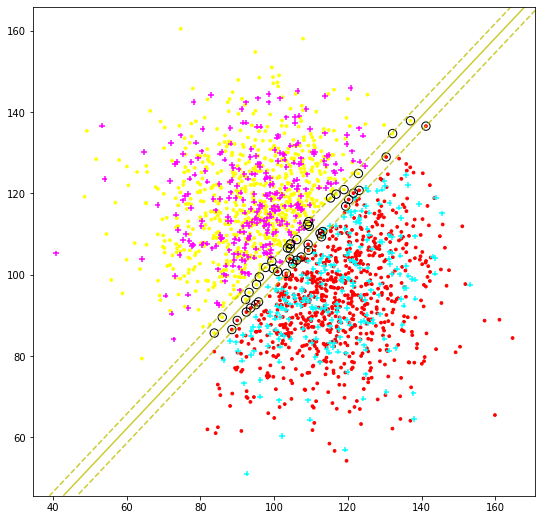

In [ ]:
y_pred=model.predict(x_test)
fig=plt.figure(figsize=(9,9))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,marker='.',s=30,cmap='autumn')
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred,marker='+',s=30,cmap='cool')
ax=plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)
YY,XX=np.meshgrid(yy,xx)
xy=np.vstack([XX.ravel(),YY.ravel()]).T
Z=model.decision_function(xy).reshape(XX.shape)
ax.contour(XX,YY,Z,colors='y',levels=[-1,0,1],alpha=0.8,linestyles=['--','-','--'])
ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=70,linewidth=1,facecolors='none',edgecolors='black')
plt.show()

In [ ]:
misclassification = 1 - model.score(x_test, y_test)
print("Misclassified samples for C:{} are {}".format('C',misclassification))

Misclassified samples for C:C are 0.0


In [ ]:
#C=1
from sklearn.svm import SVC
model=SVC(kernel='linear',C=1)
model.fit(x_train, y_train)

SVC(C=1, kernel='linear')

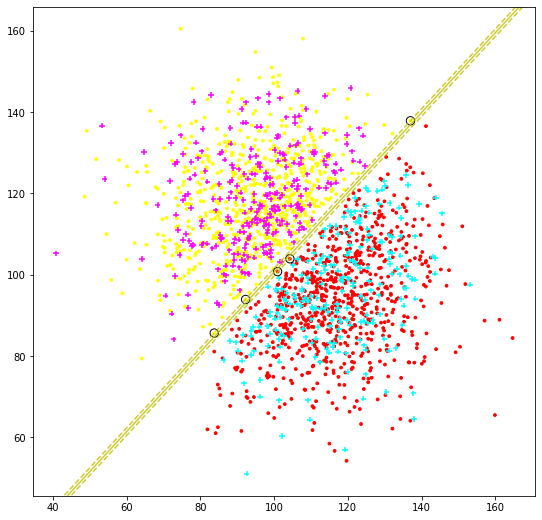

In [ ]:
y_pred=model.predict(x_test)
fig=plt.figure(figsize=(9,9))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,marker='.',s=30,cmap='autumn')
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred,marker='+',s=30,cmap='cool')
ax=plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)
YY,XX=np.meshgrid(yy,xx)
xy=np.vstack([XX.ravel(),YY.ravel()]).T
Z=model.decision_function(xy).reshape(XX.shape)
ax.contour(XX,YY,Z,colors='y',levels=[-1,0,1],alpha=0.8,linestyles=['--','-','--'])
ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=70,linewidth=1,facecolors='none',edgecolors='black')
plt.show()

In [ ]:
misclassification = 1 - model.score(x_test, y_test)
print("Misclassified samples for C:{} are {}".format('C',misclassification))

Misclassified samples for C:C are 0.0


2. Handwritten digit recognition using SVM



In [ ]:
#parse through the binary train and test file and fill null values of the 784 values as zero to make the dataset balanced
colnames=list(range(0,703,1))
train_01_images=pd.read_csv("/content/gdrive/MyDrive/course project/Daya Alex - train_01_images",sep='[: ]',engine='python',names=colnames)
train_01_images=train_01_images.fillna(0)

colnames=list(range(0,607,1))
test_01_images=pd.read_csv("/content/gdrive/MyDrive/course project/Daya Alex - test_01_images",sep='[: ]',engine='python',names=colnames)
test_01_images=test_01_images.fillna(0)

train_01_images.head()

,0,1,2,3,4,5,6,7,8,9,...,693,694,695,696,697,698,699,700,701,702
0,-1,127,51,128,159,129,253,130,159,131,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,158,124,159,253,160,255,161,63,185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,124,145,125,255,126,211,127,31,151,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,152,5,153,63,154,197,180,20,181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,151,1,152,168,153,242,154,28,179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_01_images.head()

,0,1,2,3,4,5,6,7,8,9,...,597,598,599,600,601,602,603,604,605,606
0,1,128,38,129,254,130,109,156,87,157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1,124,11,125,150,126,253,127,202,128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,156,77,157,254,158,107,159,3,183,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1,123,61,124,3,125,42,126,118,127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1,152,17,153,66,154,138,155,255,156,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#assign train_feature_set with all elements of the dataframe exeppt column 0 ie. pixel index and corresponding pixel values from 1 to702
train_feature_set=train_01_images.iloc[:,1:]

In [ ]:
print(len(train_feature_set))

12665


In [ ]:
#we have to create a dataset such that all the values inside each row correspond to the gray value of the pixel at their repective index of 784 dimension of the image.
#so first create a zero matrix
new_train_dataset=np.zeros((len(train_feature_set),784))

In [ ]:
print(new_train_dataset.shape)

(12665, 784)


In [ ]:
#renders the array to image
def array_to_image(x):
    plt.figure(figsize=(6,6),dpi=70)
    color_map=plt.imshow(x)
    color_map.set_cmap("Greys")

In [ ]:
#this function seperates the pixel values and pixel indices value from the dataframe and appends them to seperate lists: value_array and index_array
def convert_tuple(temp_array):
    index_array=[]
    value_array=[]
    for i in range(len(temp_array)):
      #append all even columns to index_array as it contains index values(0 to 784)
        if i%2==0 and temp_array[i]!=0:
            index_array.append(int(temp_array[i]))
      #append all odd columns to value_array as it contains the gray value of the pixel(0 to 256)
        if i % 2 != 0:
            value_array.append(int(temp_array[i]))
    actual_length=len(index_array)
    #truncate the arrays to actual length
    index_array=index_array[:actual_length]
    value_array=value_array[:actual_length]

    return index_array,value_array

In [ ]:
#Iterate over all images in training set, and call the convert_tuple to get each image's inex and value array
for j in range(len(train_feature_set)):
    temp_list=[]
    #stores all the data corrsponding to each row(images) to temp_list
    temp_list=train_feature_set.iloc[j,:].to_numpy()
    #call covert_tupple function and assign the returned value_array and index_array to index_list and value_list
    index_list,value_list=convert_tuple(temp_list)
    #extract each value in index_list and value_list and create new_train_dataset by filling each image's pixel value column wise, keep appending all images
    for i in range(len(index_list)):
        loc=int(index_list[i])
        val=int(value_list[i])
        new_train_dataset[j,loc]=val
#pd.set_option('precision',0)
df=pd.DataFrame(new_train_dataset[0].reshape(28,28))
df.loc[(df!=0).any(axis=0),(df!=0).any(axis=0)]

Streaming output truncated to the last 5000 lines.
63
154
101
79
150
63
97
156
76
258
124
182
230
67
114
159
259
119
196
268
114
226
105
66
224
198
261
116
130
59
105
224
112
138
120
59
268
71
198
99
173
164
107
118
236
227
115
215
96
70
143
95
201
99
207
80
64
51
178
203
88
96
120
251
70
84
206
88
151
116
160
74
93
89
90
171
147
89
205
214
65
94
267
96
91
194
70
195
65
214
102
77
191
241
130
65
217
225
155
233
105
199
222
147
73
94
245
79
191
233
137
87
203
107
149
126
118
231
147
60
115
260
165
123
200
140
180
253
60
241
141
260
164
145
82
168
150
77
161
252
67
275
127
151
68
109
77
150
224
88
202
215
197
86
80
259
196
128
269
114
213
72
128
213
83
72
86
174
71
167
86
81
158
167
74
99
75
175
83
142
93
90
89
80
85
70
121
63
236
73
117
190
82
195
184
67
263
99
290
118
176
252
116
97
45
254
75
68
121
291
262
96
124
175
101
90
257
292
71
138
189
68
95
115
113
138
117
193
152
56
113
189
257
226
59
78
218
120
93
251
136
200
107
235
96
93
106
113
247
78
191
63
94
92
170
256
221
231
169
94
6

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,227.0,253.0,252.0,239.0,233.0,252.0,57.0,6.0,0.0
7,0.0,0.0,0.0,0.0,0.0,10.0,60.0,224.0,252.0,253.0,252.0,202.0,84.0,252.0,253.0,122.0,0.0
8,0.0,0.0,0.0,0.0,0.0,163.0,252.0,252.0,252.0,253.0,252.0,252.0,96.0,189.0,253.0,167.0,0.0
9,0.0,0.0,0.0,0.0,51.0,238.0,253.0,253.0,190.0,114.0,253.0,228.0,47.0,79.0,255.0,168.0,0.0
10,0.0,0.0,0.0,48.0,238.0,252.0,252.0,179.0,12.0,75.0,121.0,21.0,0.0,0.0,253.0,243.0,50.0
11,0.0,0.0,38.0,165.0,253.0,233.0,208.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,253.0,252.0,165.0
12,0.0,7.0,178.0,252.0,240.0,71.0,19.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,253.0,252.0,195.0
13,0.0,57.0,252.0,252.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,253.0,252.0,195.0
14,0.0,198.0,253.0,190.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0,253.0,196.0
15,76.0,246.0,252.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,253.0,252.0,148.0


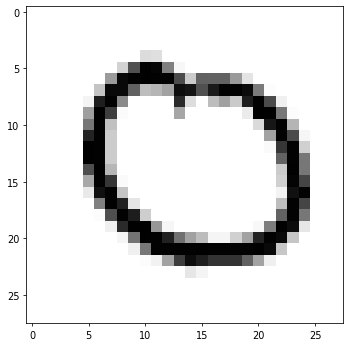

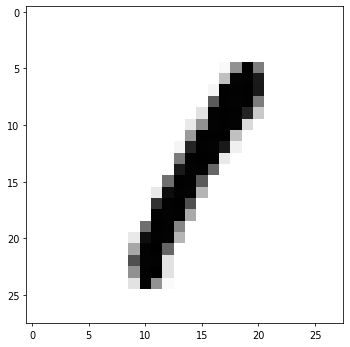

In [ ]:
array_to_image(new_train_dataset[30].reshape(28,28))
array_to_image(new_train_dataset[12600].reshape(28,28))

In [ ]:
x_trainim=new_train_dataset
y_trainim=train_01_images.iloc[:,0].to_numpy()

In [ ]:
test_feature_set=test_01_images.iloc[:,1:]

In [ ]:
new_test_dataset=np.zeros((len(test_feature_set),784))

for j in range(len(test_feature_set)):
    temp_list=[]
    temp_list=test_feature_set.iloc[j,:].to_numpy()
    index_list,value_list=convert_tuple(temp_list)
    for i in range(len(index_list)):
        loc=int(index_list[i])
        val=int(value_list[i])
        new_test_dataset[j,loc]=val

64
193
82
169
168
75
268
196
68
61
81
100
46
104
154
60
173
215
87
93
111
74
169
85
176
89
152
105
70
63
150
70
133
87
56
77
65
180
198
59
112
75
180
174
96
74
54
65
171
57
69
70
216
61
100
101
153
187
65
80
48
78
163
227
178
70
188
271
190
69
130
173
85
78
67
80
83
157
76
98
82
52
140
156
58
77
175
63
74
76
173
86
79
69
169
62
75
286
154
108
87
134
51
90
70
147
59
139
153
51
68
86
167
94
85
149
163
198
152
131
118
184
83
146
199
155
170
199
115
143
168
89
163
164
83
72
212
137
70
78
71
75
65
70
87
236
177
159
86
161
164
139
62
71
219
97
58
150
68
61
181
63
90
76
95
59
88
178
89
182
51
85
145
68
83
71
61
77
109
210
76
87
160
164
221
150
78
194
174
88
193
68
50
52
53
180
62
78
102
59
59
75
198
98
91
183
55
61
159
103
234
160
77
83
170
84
83
80
76
66
166
68
45
65
164
75
215
54
60
194
174
59
189
111
88
56
99
185
203
141
64
95
160
62
159
76
177
162
86
239
108
78
100
165
155
241
194
59
75
116
156
66
72
166
188
200
59
165
167
65
177
84
92
73
98
75
206
77
80
109
68
63
52
225
232
56
86
163
98


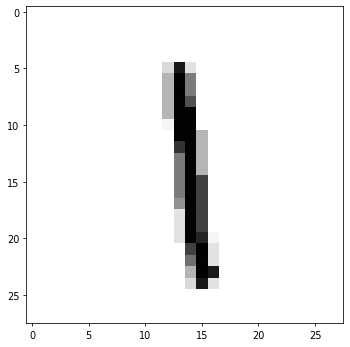

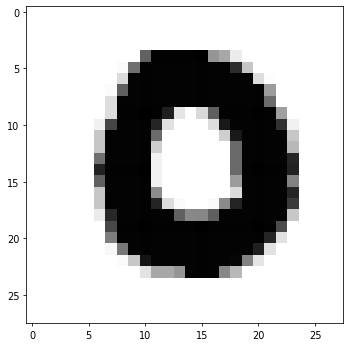

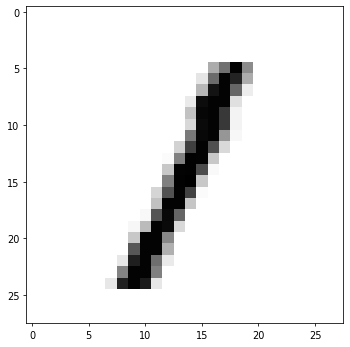

In [ ]:
array_to_image(new_test_dataset[159].reshape(28,28))
array_to_image(new_test_dataset[67].reshape(28,28))
array_to_image(new_test_dataset[2100].reshape(28,28))

In [ ]:
x_testim=new_test_dataset
y_testim=test_01_images.iloc[:,0].to_numpy()

In [ ]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x_trainim, y_trainim)

SVC(kernel='linear')

In [ ]:
model.score(x_trainim, y_trainim)

1.0

In [ ]:
model.score(x_testim, y_testim)

0.9990543735224586

In [ ]:
y_pred=model.predict(x_testim)
misclassified_examples=[]
for i in range(len(y_pred)):
    if y_pred[i]!=y_testim[i]:
        misclassified_examples.append(i)
print("No. of misclassifications: ",len(misclassified_examples))
misclassified_examples

No. of misclassifications:  2


[1664, 2031]

In [ ]:
print("Test Image No: ",misclassified_examples[0])
print("Actual: ",y_testim[misclassified_examples[0]])
print("Predicted: ",y_pred[misclassified_examples[0]])

Test Image No:  1664
Actual:  1
Predicted:  -1


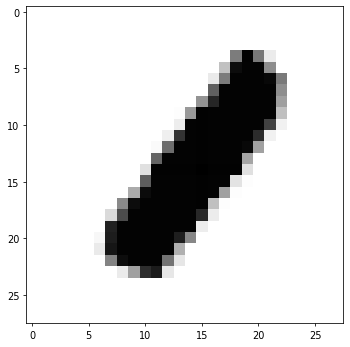

In [ ]:
array_to_image(new_test_dataset[misclassified_examples[0]].reshape(28,28))

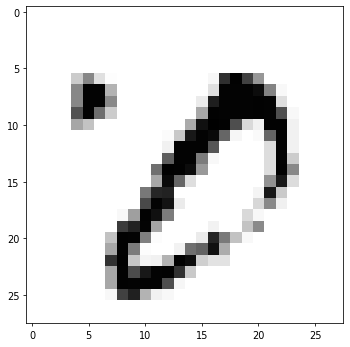

In [ ]:
array_to_image(new_test_dataset[misclassified_examples[1]].reshape(28,28))

In [ ]:
print("Test Image No: ",misclassified_examples[1])
print("Actual: ",y_testim[misclassified_examples[1]])
print("Predicted: ",y_pred[misclassified_examples[1]])

Test Image No:  2031
Actual:  -1
Predicted:  1


In [ ]:
#finding accuracy in training set
c_matrix=[]
accuracy_matrix=[]
regularization_term=0.000000000005
while regularization_term<1:
    model=SVC(kernel='linear',C=regularization_term)
    model.fit(x_trainim,y_trainim)
    y_pred=model.predict(x_trainim)
    accuracy_1=model.score(x_trainim, y_trainim)*100
    c_matrix.append(regularization_term)
    accuracy_matrix.append(accuracy_1)
    print("C= ",round(regularization_term,100),"- Accuracy: ",accuracy_1)
    regularization_term*=10

C=  5e-12 - Accuracy:  53.233320173707064
C=  4.9999999999999995e-11 - Accuracy:  87.49309119621003
C=  4.999999999999999e-10 - Accuracy:  99.60521121200158
C=  4.999999999999999e-09 - Accuracy:  99.8026056060008
C=  4.999999999999999e-08 - Accuracy:  99.8973549151204
C=  4.999999999999999e-07 - Accuracy:  99.9526253454402
C=  4.999999999999999e-06 - Accuracy:  100.0
C=  4.999999999999999e-05 - Accuracy:  100.0
C=  0.0004999999999999999 - Accuracy:  100.0
C=  0.004999999999999999 - Accuracy:  100.0
C=  0.04999999999999999 - Accuracy:  100.0
C=  0.4999999999999999 - Accuracy:  100.0


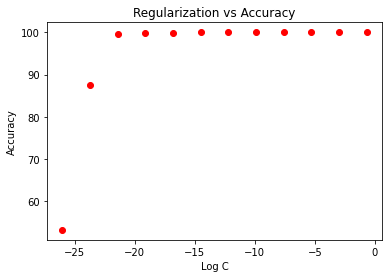

In [ ]:
plt.plot(np.log(c_matrix),accuracy_matrix,'ro')
plt.title("Regularization vs Accuracy")
plt.xlabel("Log C")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
#finding accuracy in test set
c_matrix=[]
accuracy_matrix=[]
regularization_term=0.000000000005
while regularization_term<1:
    model=SVC(kernel='linear',C=regularization_term)
    model.fit(x_trainim,y_trainim)
    y_pred=model.predict(x_testim)
    accuracy_1=model.score(x_testim, y_testim)*100
    c_matrix.append(regularization_term)
    accuracy_matrix.append(accuracy_1)
    print("C= ",round(regularization_term,100),"- Accuracy: ",accuracy_1)
    regularization_term*=10

C=  5e-12 - Accuracy:  53.664302600472816
C=  4.9999999999999995e-11 - Accuracy:  86.95035460992908
C=  4.999999999999999e-10 - Accuracy:  99.76359338061465
C=  4.999999999999999e-09 - Accuracy:  99.90543735224587
C=  4.999999999999999e-08 - Accuracy:  99.90543735224587
C=  4.999999999999999e-07 - Accuracy:  99.95271867612293
C=  4.999999999999999e-06 - Accuracy:  99.90543735224587
C=  4.999999999999999e-05 - Accuracy:  99.90543735224587
C=  0.0004999999999999999 - Accuracy:  99.90543735224587
C=  0.004999999999999999 - Accuracy:  99.90543735224587
C=  0.04999999999999999 - Accuracy:  99.90543735224587
C=  0.4999999999999999 - Accuracy:  99.90543735224587


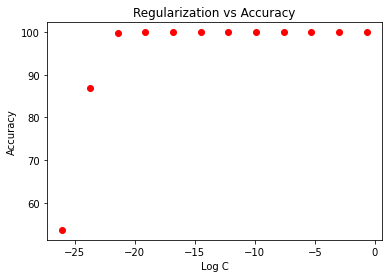

In [ ]:
plt.plot(np.log(c_matrix),accuracy_matrix,'ro')
plt.title("Regularization vs Accuracy")
plt.xlabel("Log C")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
dataframe1 = pd.read_csv("/content/gdrive/MyDrive/course project/Daya Alex - train_3.text" ,sep='\s+')
dataframe1.to_csv('/content/gdrive/MyDrive/course project/Daya Alex - train_3.csv', 
                  index = None)


3. Radial Basis kernel SVM




In [ ]:
x_train = dataframe1.iloc[:,0:2].values
y_train = dataframe1.iloc[:,2].values

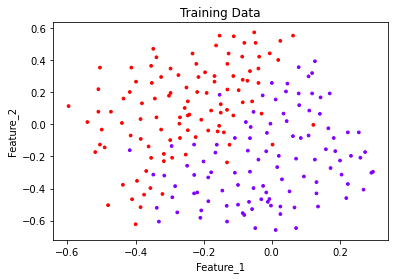

In [ ]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,marker='.',s=30,cmap='rainbow')
plt.title("Training Data")
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.show()# very mixed dataset, linear seperation not possible

In [ ]:
#rbf training
model=SVC(kernel='rbf',gamma=100)
model.fit(x_train,y_train)

SVC(gamma=100)

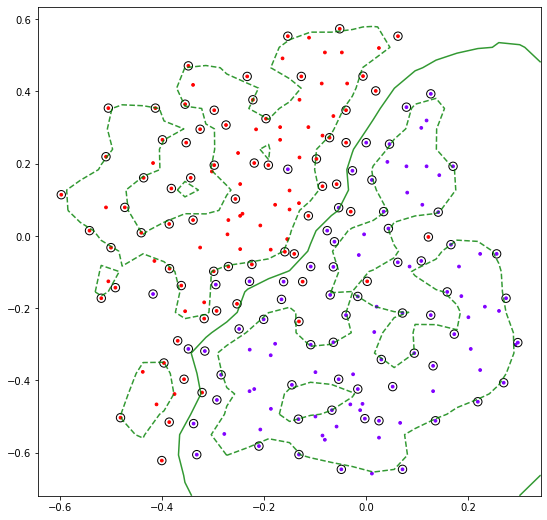

In [ ]:
fig=plt.figure(figsize=(9,9))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,marker='.',s=30,cmap='rainbow')
ax=plt.gca()
x_lim=ax.get_xlim()
y_lim=ax.get_ylim()
xx=np.linspace(x_lim[0],x_lim[1],25)
yy=np.linspace(y_lim[0],y_lim[1],25)
YY,XX=np.meshgrid(yy,xx)
xy=np.vstack([XX.ravel(),YY.ravel()]).T
Z=model.decision_function(xy).reshape(XX.shape)
#plot decision boundary and margins
ax.contour(XX,YY,Z,colors='g',levels=[-1,0,1],alpha=0.8,linestyles=['--','-','--'])
#plot support vectors
ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=70,linewidth=1,facecolor='none',edgecolors='black')
plt.show()#overfitted decision boundary

In [ ]:
model=SVC(kernel='rbf',gamma=1)
model.fit(x_train,y_train)

SVC(gamma=1)

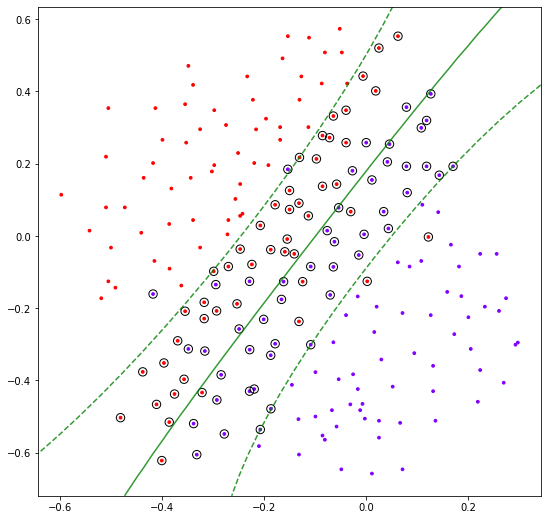

In [ ]:
fig=plt.figure(figsize=(9,9))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,marker='.',s=30,cmap='rainbow')
ax=plt.gca()
x_lim=ax.get_xlim()
y_lim=ax.get_ylim()
xx=np.linspace(x_lim[0],x_lim[1],25)
yy=np.linspace(y_lim[0],y_lim[1],25)
YY,XX=np.meshgrid(yy,xx)
xy=np.vstack([XX.ravel(),YY.ravel()]).T
Z=model.decision_function(xy).reshape(XX.shape)
#plot decision boundary and margins
ax.contour(XX,YY,Z,colors='g',levels=[-1,0,1],alpha=0.8,linestyles=['--','-','--'])
#plot support vectors
ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=70,linewidth=1,facecolor='none',edgecolors='black')
plt.show()#reasonable decision boundary

In [ ]:
model=SVC(kernel='rbf',gamma=10)
model.fit(x_train,y_train)

SVC(gamma=10)

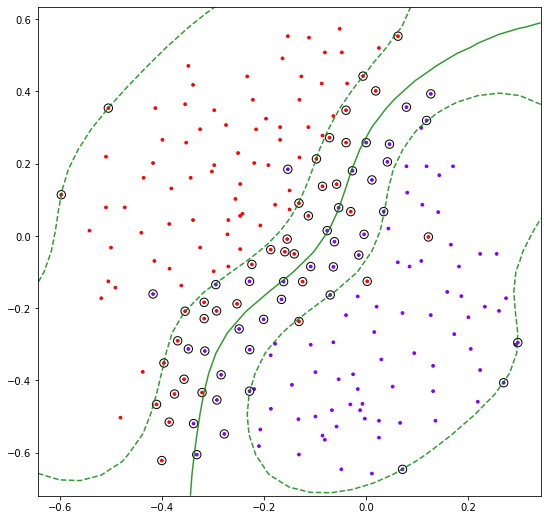

In [ ]:
fig=plt.figure(figsize=(9,9))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,marker='.',s=30,cmap='rainbow')
ax=plt.gca()
x_lim=ax.get_xlim()
y_lim=ax.get_ylim()
xx=np.linspace(x_lim[0],x_lim[1],25)
yy=np.linspace(y_lim[0],y_lim[1],25)
YY,XX=np.meshgrid(yy,xx)
xy=np.vstack([XX.ravel(),YY.ravel()]).T
Z=model.decision_function(xy).reshape(XX.shape)
#plot decision boundary and margins
ax.contour(XX,YY,Z,colors='g',levels=[-1,0,1],alpha=0.8,linestyles=['--','-','--'])
#plot support vectors
ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=70,linewidth=1,facecolor='none',edgecolors='black')
plt.show()#tending to be overfitted

In [ ]:
model=SVC(kernel='rbf',gamma=1000)
model.fit(x_train,y_train)

SVC(gamma=1000)

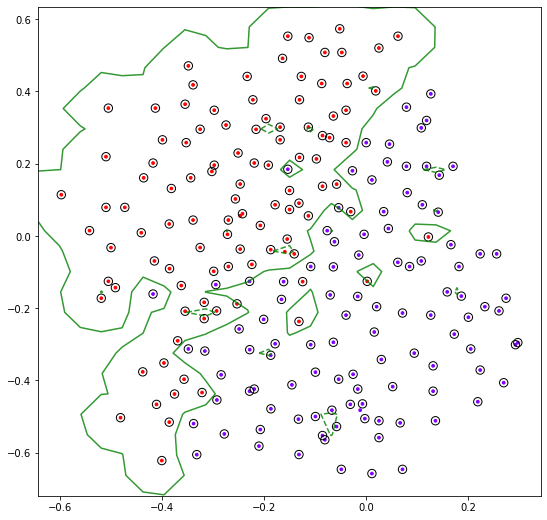

In [ ]:
fig=plt.figure(figsize=(9,9))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,marker='.',s=30,cmap='rainbow')
ax=plt.gca()
x_lim=ax.get_xlim()
y_lim=ax.get_ylim()
xx=np.linspace(x_lim[0],x_lim[1],25)
yy=np.linspace(y_lim[0],y_lim[1],25)
YY,XX=np.meshgrid(yy,xx)
xy=np.vstack([XX.ravel(),YY.ravel()]).T
Z=model.decision_function(xy).reshape(XX.shape)
#plot decision boundary and margins
ax.contour(XX,YY,Z,colors='g',levels=[-1,0,1],alpha=0.8,linestyles=['--','-','--'])
#plot support vectors
ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=70,linewidth=1,facecolor='none',edgecolors='black')
plt.show()# hughly overfitted, all datapoints becomes support vectors